# Example for reading clm-file for example Tol
The clm.nc file is read and *variable* is extracted. Next, the mesh data is manipulated, converted to a raster and saved to a .tiff.

Manipulation of the mesh data includes obtaining the arrival time, the maximum rising speed, and the water height h_mrs at which this happen.

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np

currentdir = os.path.dirname(os.getcwd())
sys.path.append(currentdir)
sys.path.append(currentdir + "\Readers")

from flowmeshreader import load_classmap_data, mesh_to_tiff
from inundation_toolbox import arrival_times, height_of_mrs, rising_speeds

In [2]:
# set paths
input_file_path = currentdir + r"\Data\Tol\input\1PT10_clm.nc"
output_file_path = currentdir + r"\Data\Tol\output"

In [3]:
# raster options
resolution = 10  # m
distance_tol = 36  # m
interpolation = r"nearest"

In [4]:
variable = r"Mesh2d_waterdepth"

In [5]:
# load mesh coordinates and data from netCDF 
clm_data, map_data = load_classmap_data(input_file_path, variable, method="lower")

In [6]:
# Prepare inundation specific parameter
t_arrival = arrival_times(clm_data, np.timedelta64(60, "s"), time_unit="h", arrival_threshold=3)

s_rising = rising_speeds(map_data, np.timedelta64(60, "s"), time_unit="s")
max_s_rising = np.amax(s_rising, axis=0)

h_mrs = height_of_mrs(map_data, s_rising)

In [7]:
# Add to lists for looping
data_arrays = [t_arrival, max_s_rising, h_mrs]
output_paths = [
    output_file_path + r"\arrival.tiff",
    output_file_path + r"\max_rising.tiff",
    output_file_path + r"\h_mrs.tiff",
]

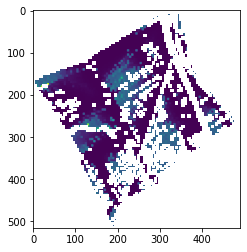

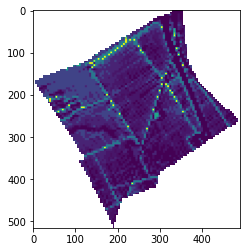

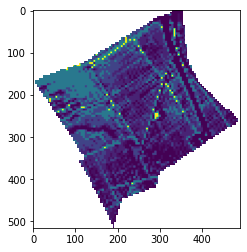

In [8]:
for data, output_file_path in zip(data_arrays, output_paths):
    _, _, grid_data = mesh_to_tiff(
        data,
        input_file_path,
        output_file_path,
        resolution,
        distance_tol,
        interpolation=interpolation,
    )

    fig = plt.figure()
    plt.imshow(grid_data[-1::-1, :])

In [9]:
# plot
plt.show()